In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [24]:
test_df = pd.read_csv('data/test.csv')

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [26]:
train_df.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [27]:
cat_cols = ['Gender', 'Education_Status', 'Employment_Status',
       'Industry_Status', 
       'Occupation_Status', 'Race',
       # 'Hispanic_Origin', 
       'Martial_Status', 
       # 'Household_Status',
       'Household_Summary', 'Citizenship', 
       # 'Birth_Country',
       # 'Birth_Country (Father)', 'Birth_Country (Mother)', 
       'Tax_Status',
       'Income_Status']

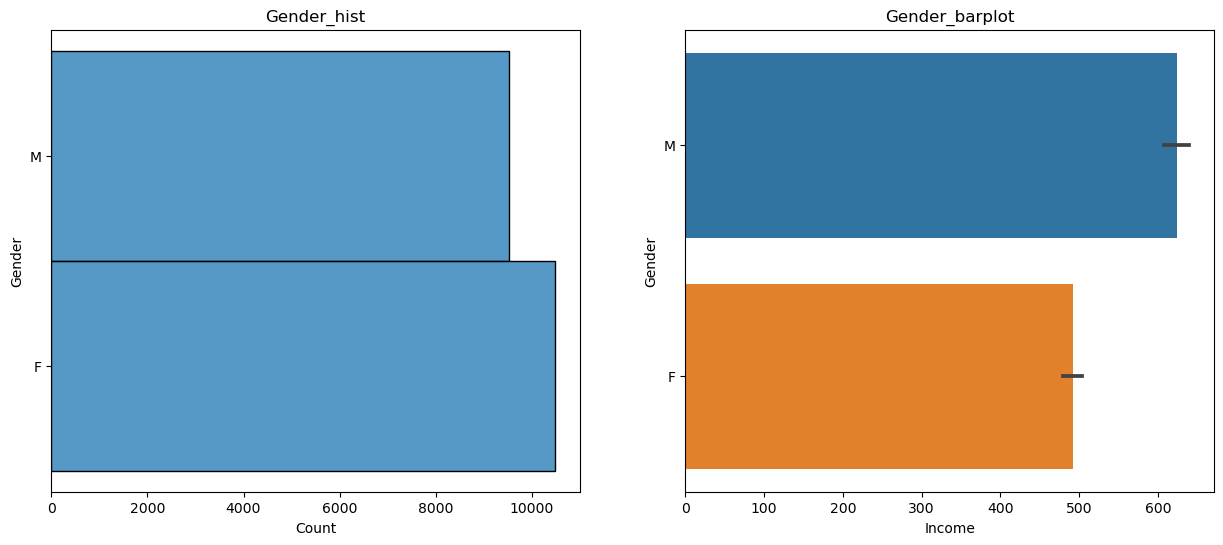

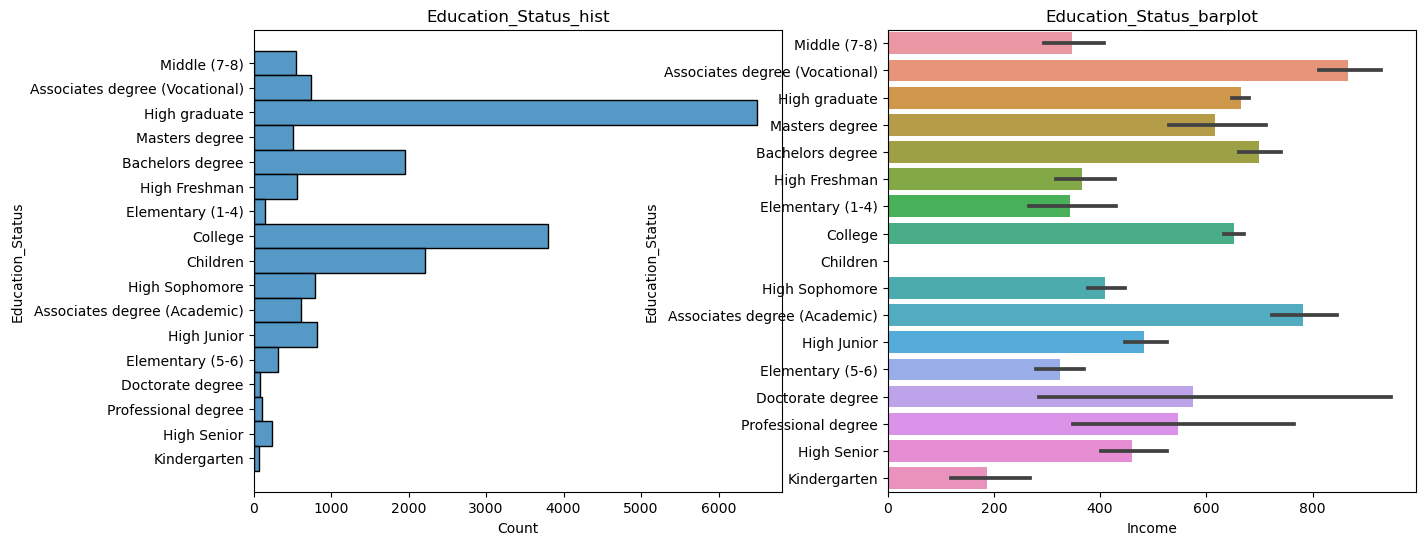

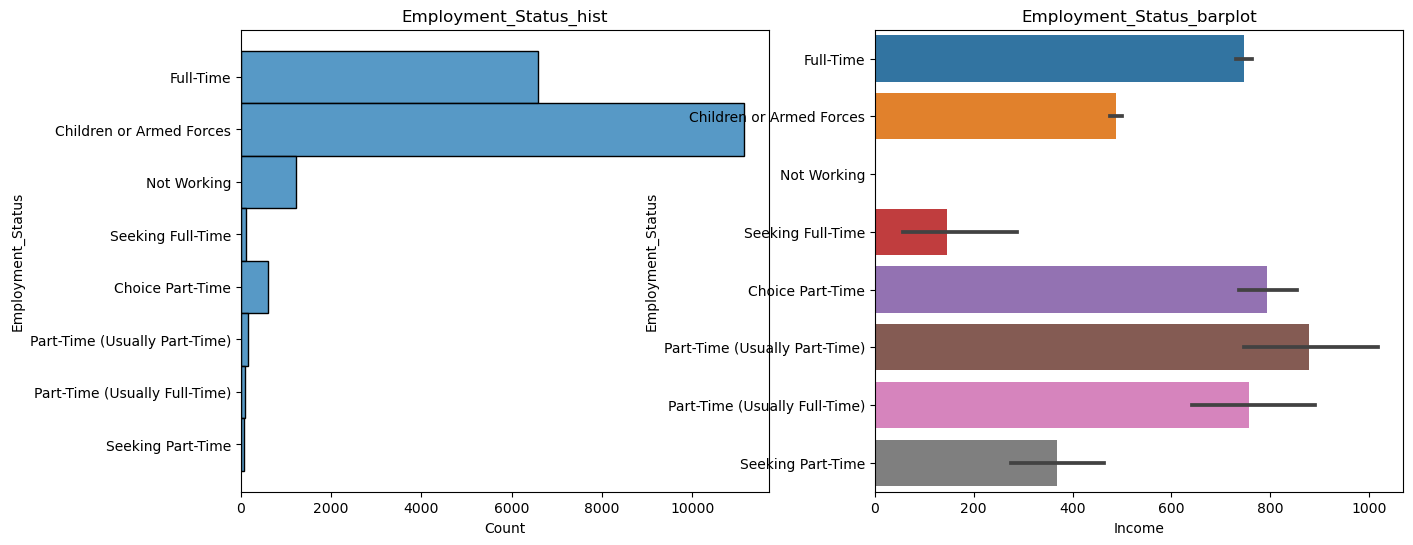

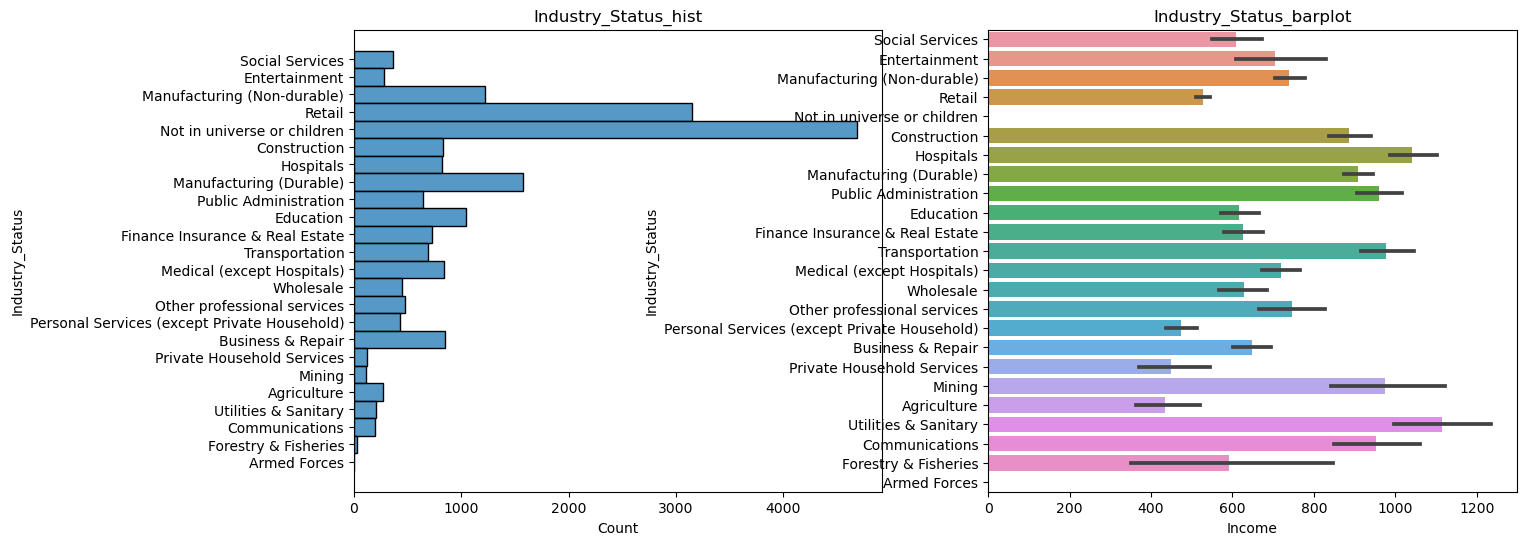

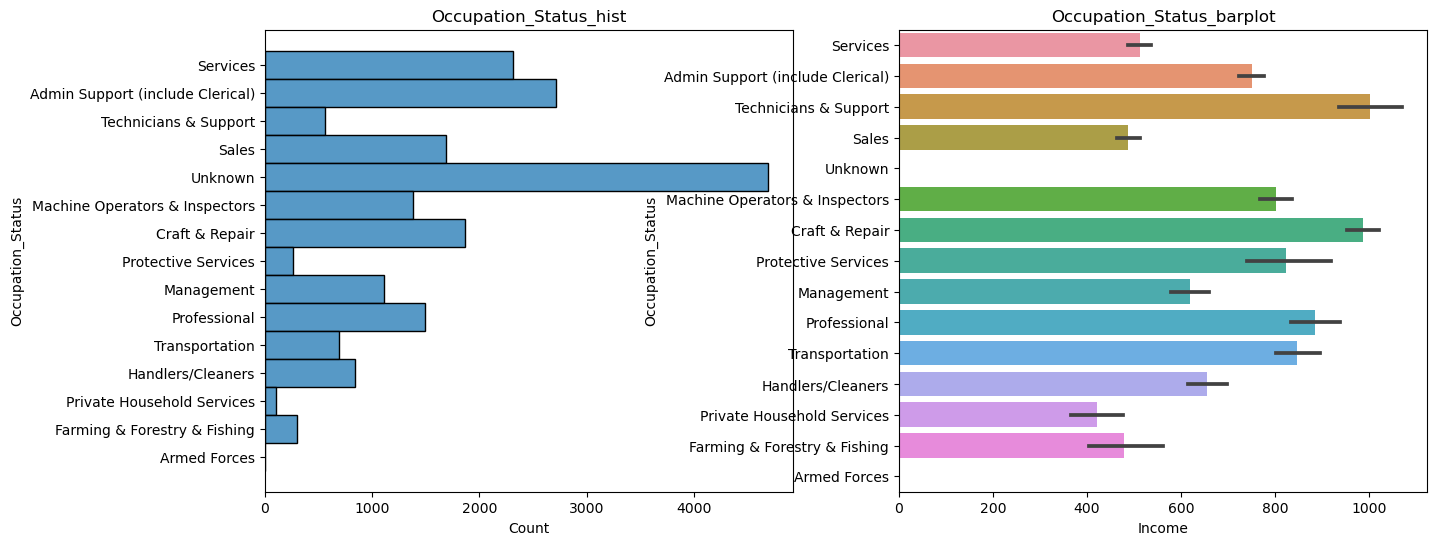

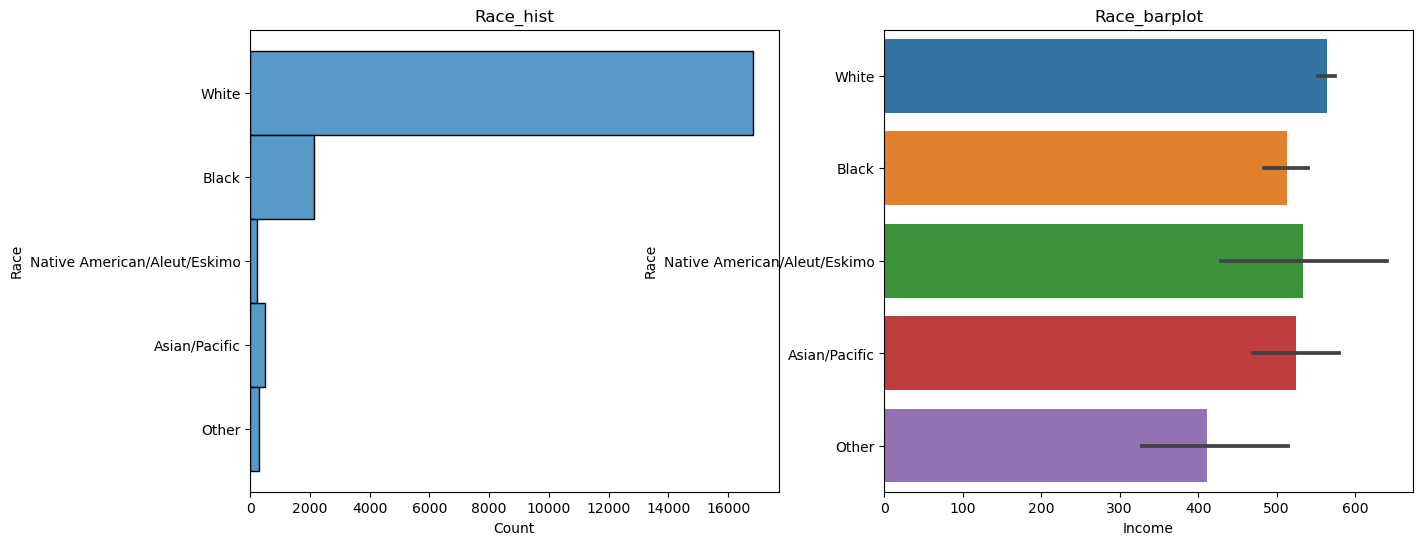

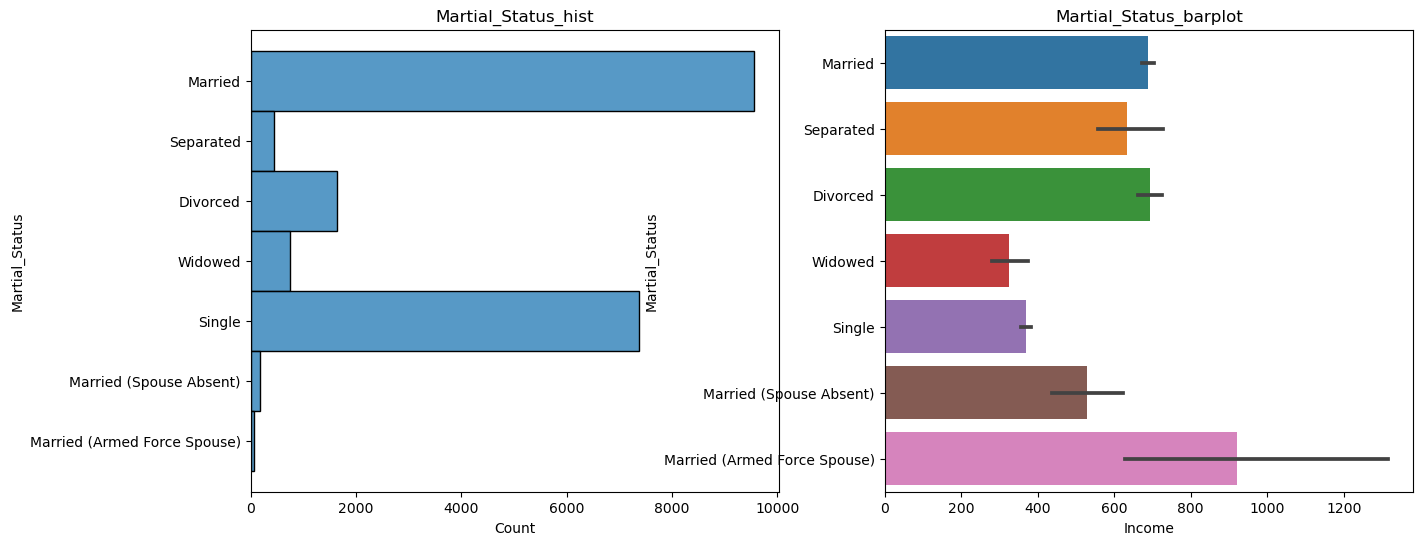

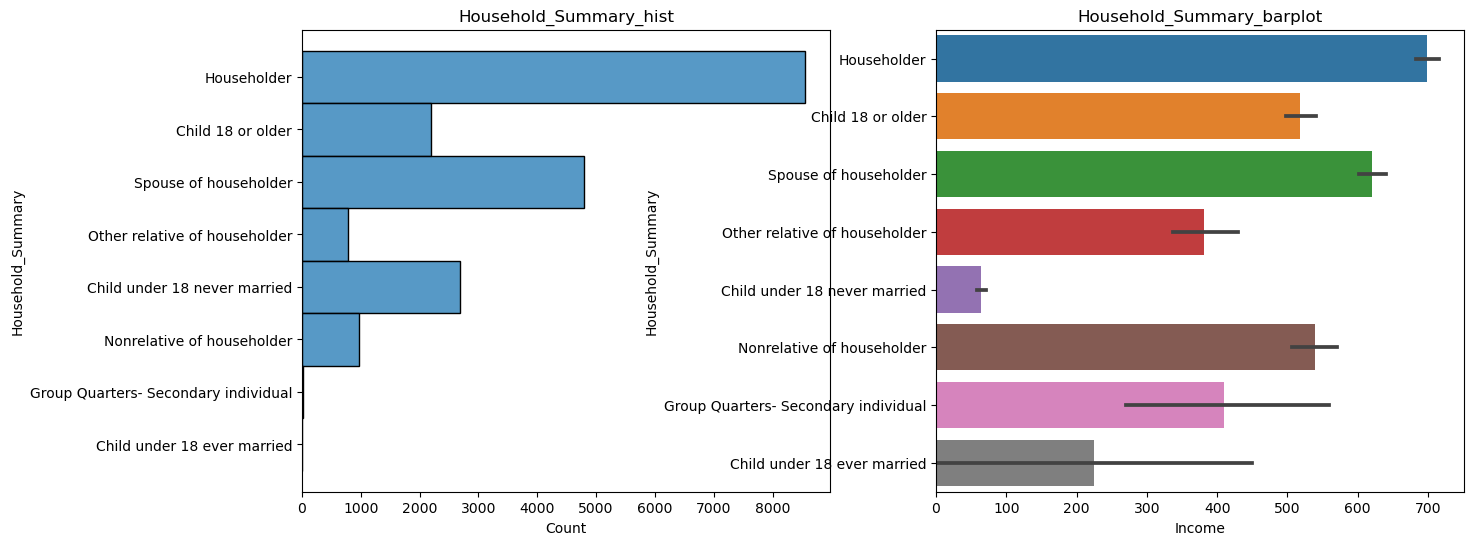

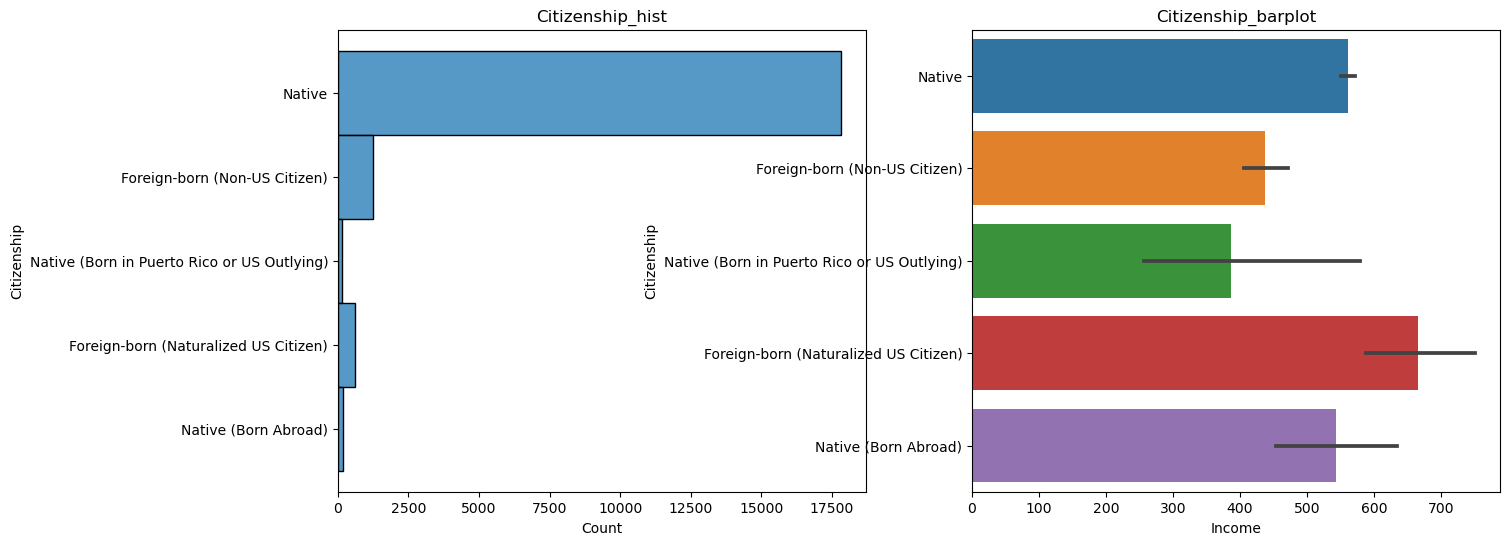

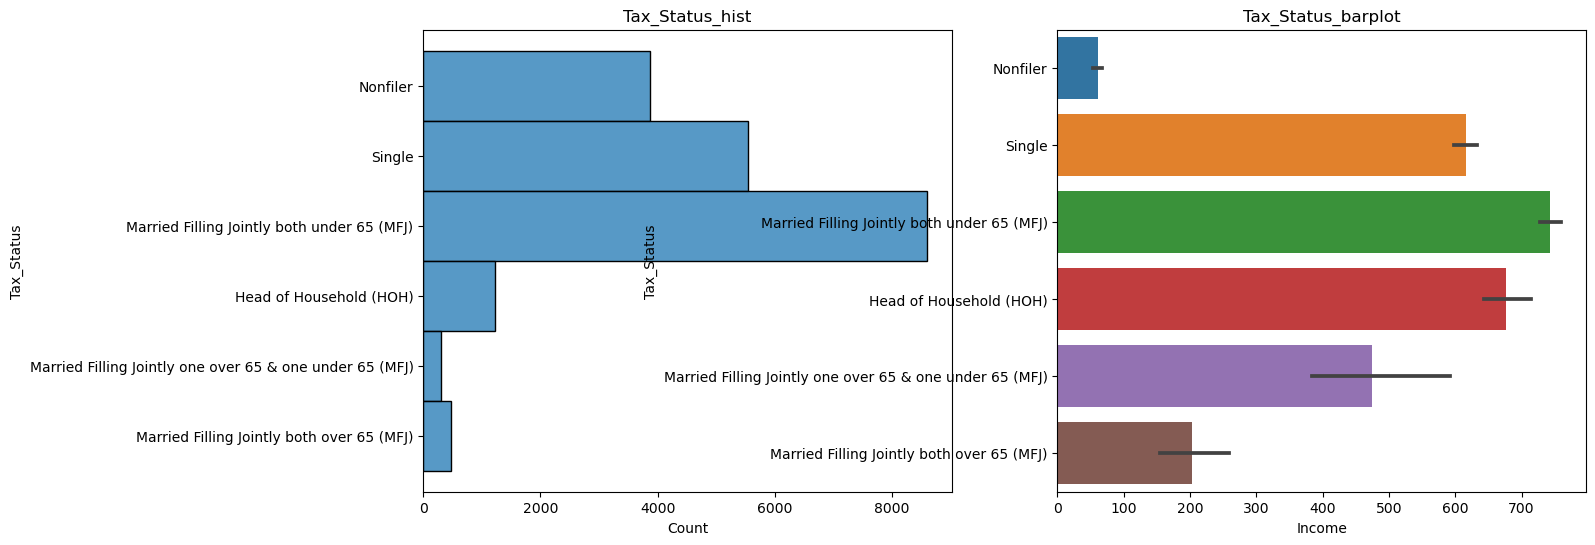

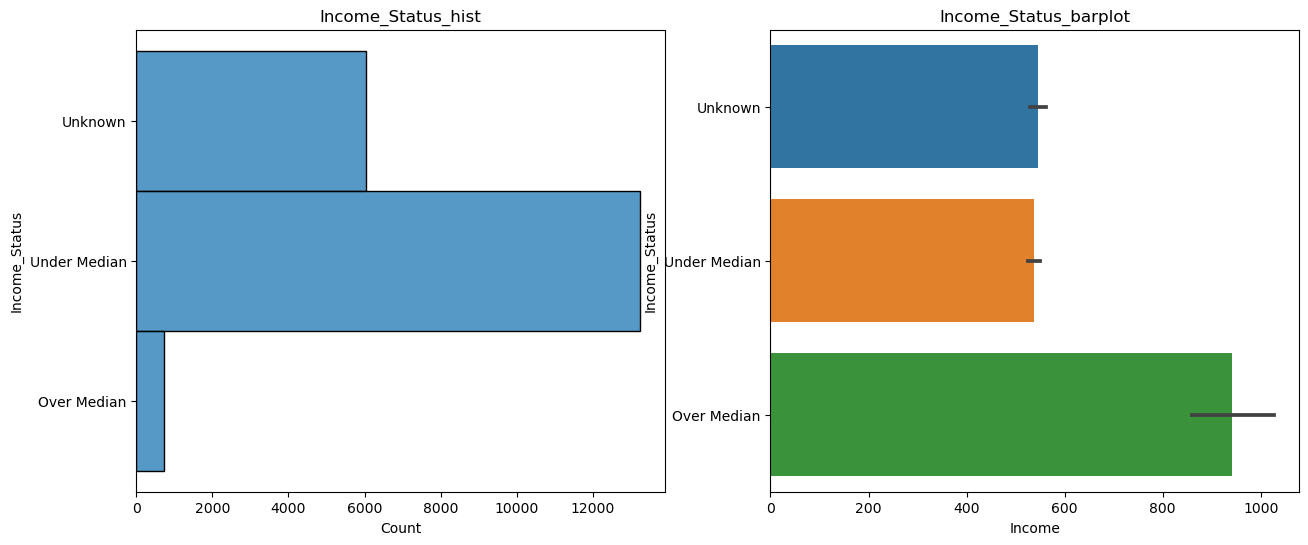

In [30]:
for c in cat_cols:
    # temp = train_df.groupby(c)['Income'].mean()
    plt.figure(figsize=(15, 6))

    plt.subplot(1,2,1)
    plt.title(f'{c}_hist')
    # plt.barh(temp.index, temp.values)
    sns.histplot(y=train_df[c]) 


    plt.subplot(1,2,2)
    plt.title(f'{c}_barplot')
    sns.barplot(x='Income', y=c, data=train_df, orient='h')

    plt.show()

In [31]:
train_df['Income']

0         425
1           0
2         860
3         850
4         570
         ... 
19995    1300
19996     850
19997     999
19998       0
19999     671
Name: Income, Length: 20000, dtype: int64

<Axes: xlabel='Income', ylabel='Count'>

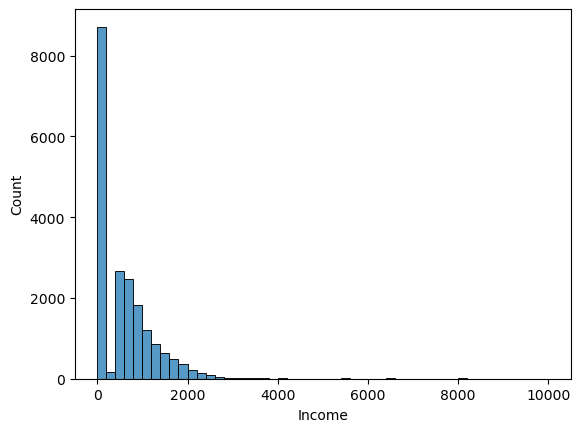

In [37]:
sns.histplot(train_df['Income'], bins=50)

<Axes: xlabel='Income', ylabel='Count'>

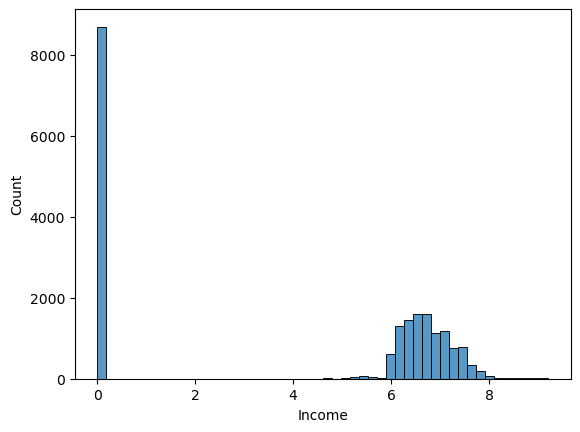

In [36]:
sns.histplot(np.log(train_df['Income']+1), bins=50)

In [38]:
sum(train_df['Income']==0)

8697

In [40]:
train_df['Income_nonzero'] = np.where(train_df['Income']>0, 1, 0)

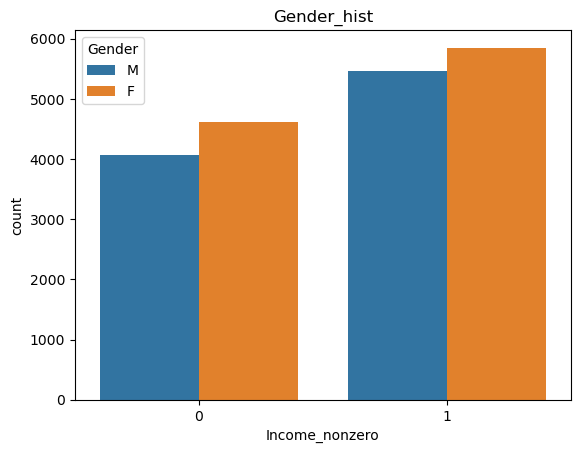

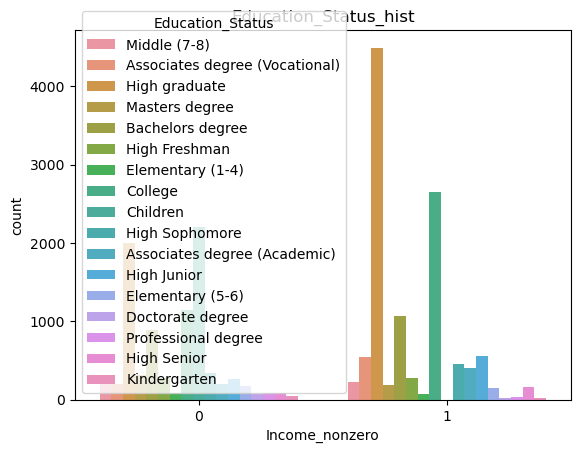

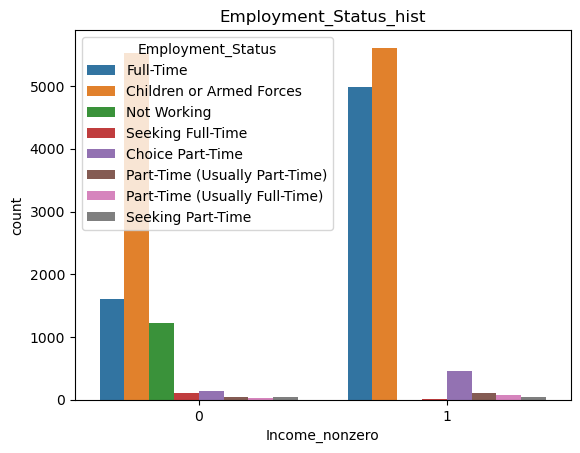

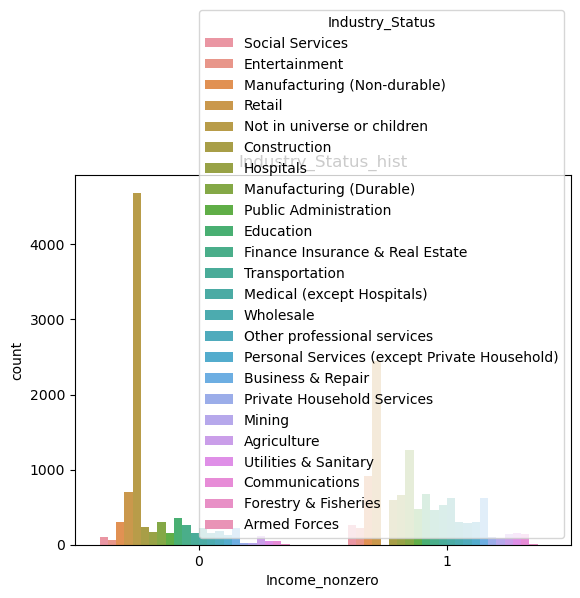

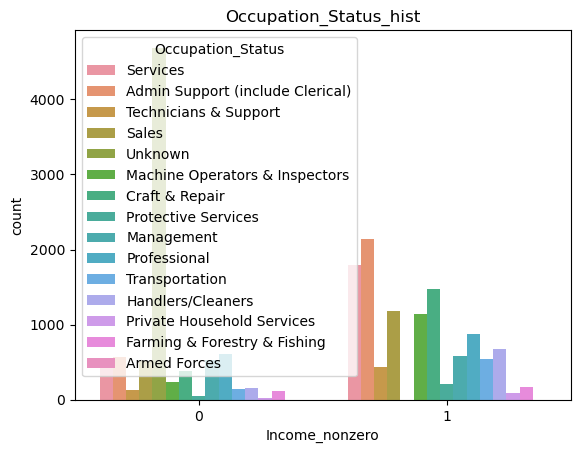

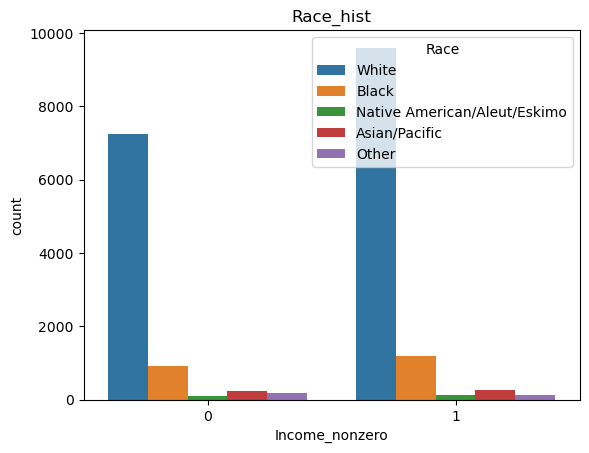

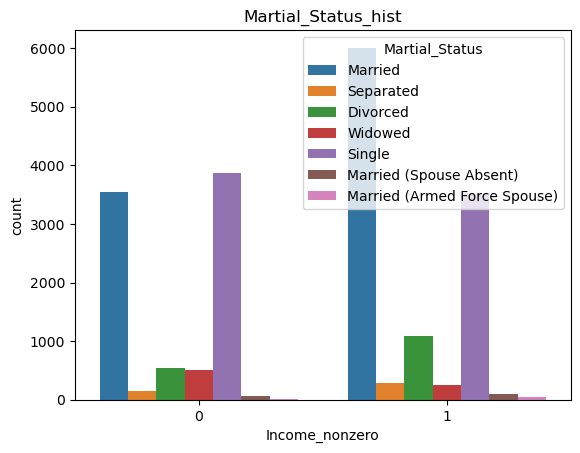

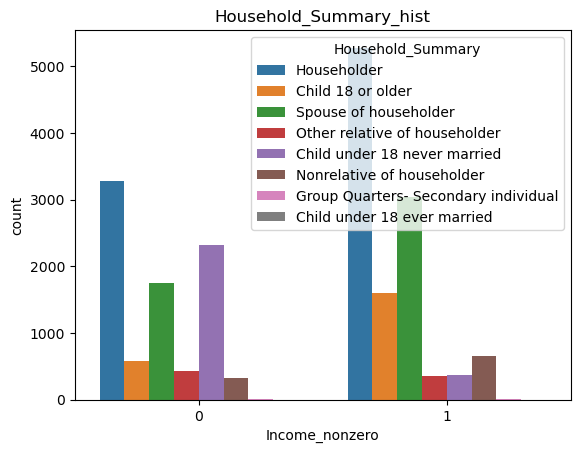

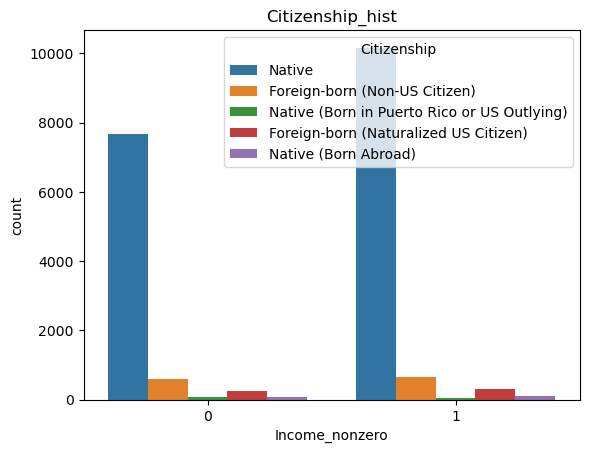

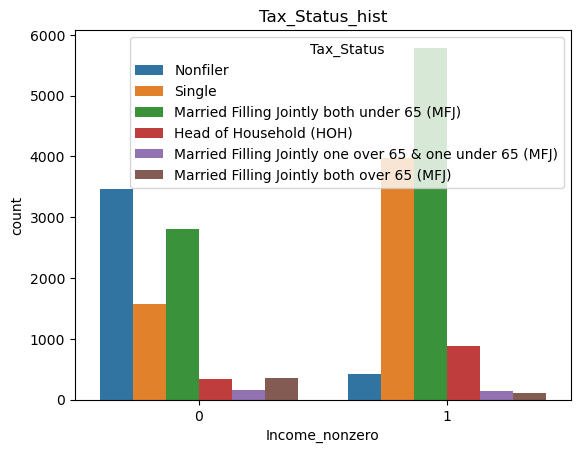

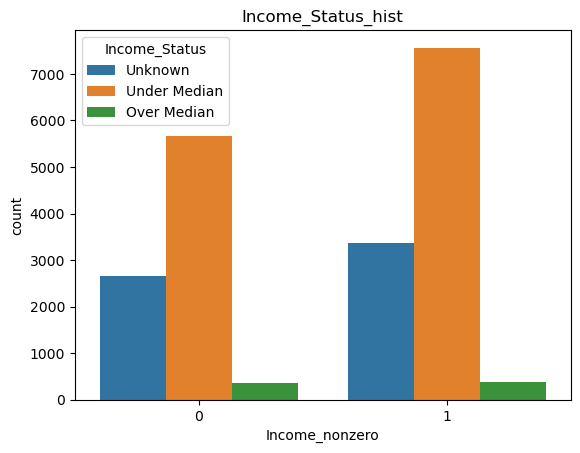

In [45]:
for c in cat_cols:
    # temp = train_df.groupby(c)['Income'].mean()

    plt.title(f'{c}_hist')
    # plt.barh(temp.index, temp.values)
    sns.countplot(x='Income_nonzero', data=train_df, hue=c) 
    plt.show()


In [74]:
np.unique(train_df['Industry_Status'])

array(['Agriculture', 'Armed Forces', 'Business & Repair',
       'Communications', 'Construction', 'Education', 'Entertainment',
       'Finance Insurance & Real Estate', 'Forestry & Fisheries',
       'Hospitals', 'Manufacturing (Durable)',
       'Manufacturing (Non-durable)', 'Medical (except Hospitals)',
       'Mining', 'Not in universe or children',
       'Other professional services',
       'Personal Services (except Private Household)',
       'Private Household Services', 'Public Administration', 'Retail',
       'Social Services', 'Transportation', 'Utilities & Sanitary',
       'Wholesale'], dtype=object)

In [76]:
len(train_df.loc[train_df['Industry_Status']=='Not in universe or children'])

4688

<Axes: xlabel='Age', ylabel='Count'>

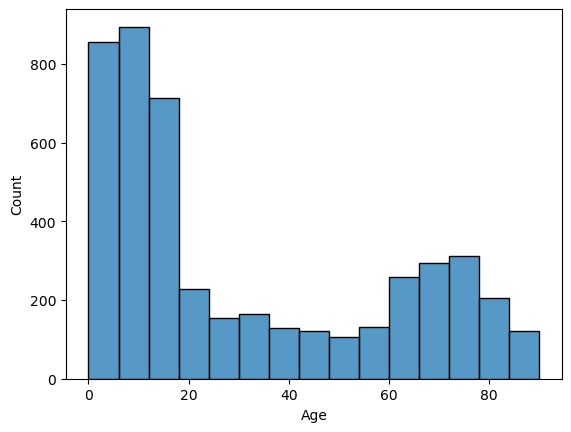

In [80]:
c = train_df.loc[train_df['Industry_Status']=='Not in universe or children']

sns.histplot(c['Age'])

In [78]:
len(train_df.loc[train_df['Age']<15])

2208

In [57]:
numeric_cols = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

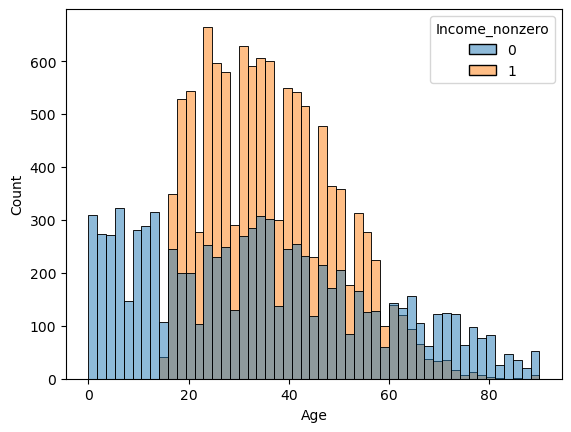

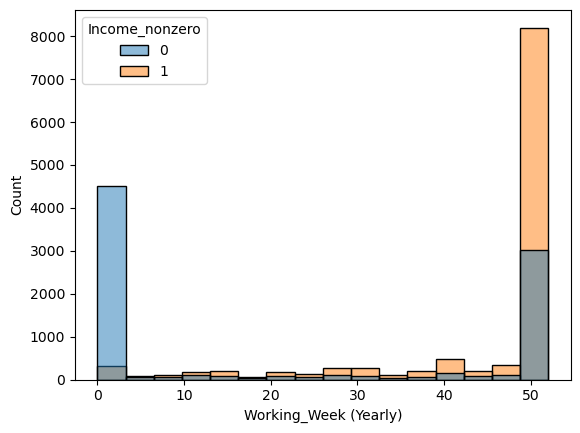

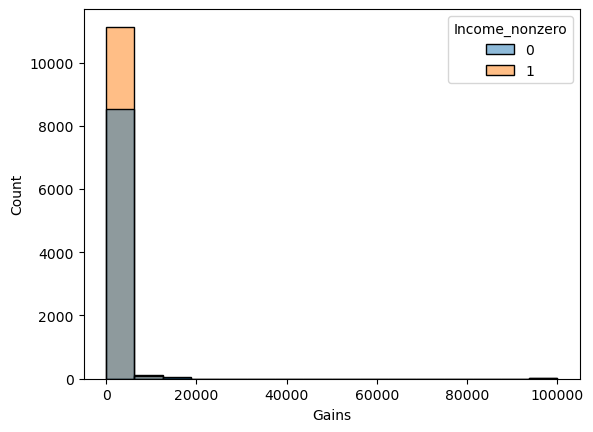

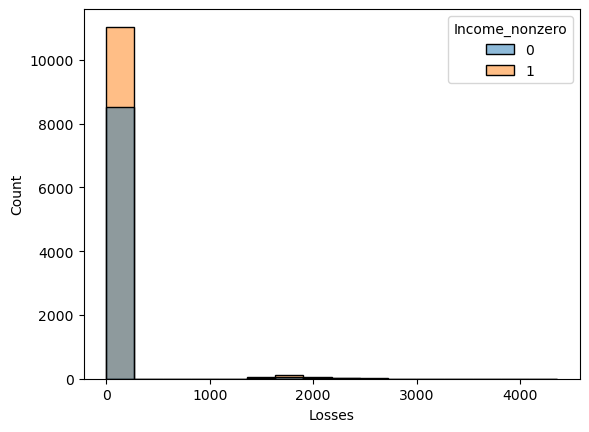

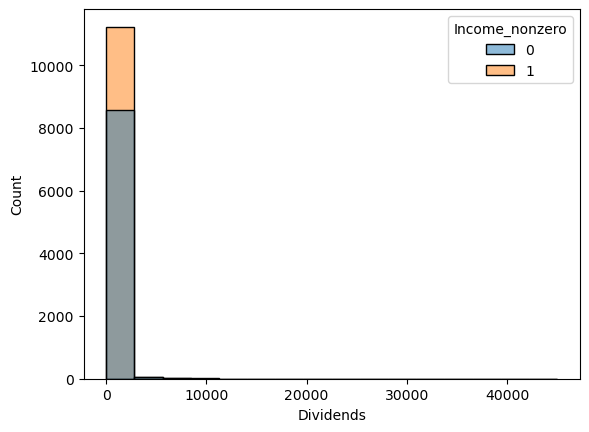

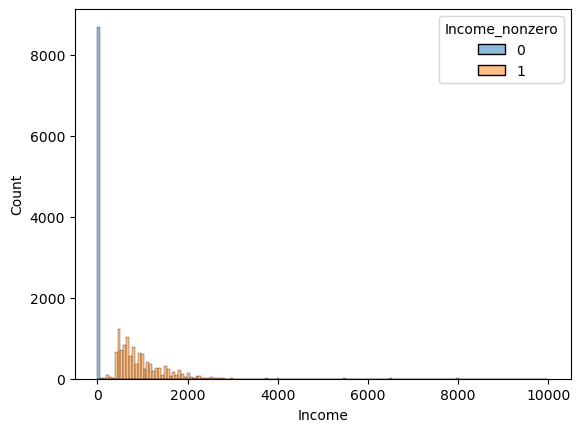

In [58]:
for c in numeric_cols:
    sns.histplot(x=c, data=train_df, hue='Income_nonzero')
    plt.show()